# 🧠 TensorFlow i Keras - Podstawy

## 📚 Kompletny przewodnik po TensorFlow / Keras

### 📋 Spis treści:
1. **Konfiguracja środowiska** - Import, GPU, reprodukowalność
2. **Podstawy tensorów** - Tworzenie, operacje, manipulacja
3. **Budowa modeli** - Sequential, Functional API
4. **Kluczowe funkcje Keras** - fit(), compile(), evaluate(), predict()
5. **Warstwy i aktywacje** - Dense, Conv2D, Dropout, BatchNorm
6. **Trenowanie i optymalizacja** - Callbacks, learning rate
7. **Praktyczne przykłady** - Klasyfikacja, regresja, CNN
8. **Zapisywanie modeli** - SavedModel, H5, weights

---

## 🎯 Dlaczego TensorFlow i Keras?

### TensorFlow:
- 🔥 **Najpopularniejszy** framework do deep learning
- ⚡ **Wydajny** - optymalizacja dla CPU, GPU, TPU
- 🌐 **Skalowalny** - od research po production

### Keras:
- 🎨 **Intuicyjny** - prosty i czytelny kod
- 🚀 **Szybki prototyping** - od pomysłu do modelu w minutach
- 🔧 **Elastyczny** - różne poziomy abstrakcji


In [1]:
# 🔧 1. KONFIGURACJA ŚRODOWISKA

# Importowanie niezbędnych bibliotek
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers, callbacks
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Sprawdzenie wersji
print("🔧 KONFIGURACJA ŚRODOWISKA")
print("=" * 50)
print(f"📦 TensorFlow version: {tf.__version__}")
print(f"🎯 Keras version: {keras.__version__}")
print(f"🔢 NumPy version: {np.__version__}")

# Sprawdzenie GPU
print(f"\n💻 SPRZĘT")
print("=" * 50)
gpus = tf.config.list_physical_devices('GPU')
print(f"🎮 GPU dostępne: {len(gpus)}")
if gpus:
    for i, gpu in enumerate(gpus):
        print(f"  GPU {i}: {gpu.name}")
else:
    print("  ⚠️  Używany będzie CPU")

# Ustawienia reprodukowalności
tf.random.set_seed(42)
np.random.seed(42)

print(f"\n✅ Środowisko gotowe!")


🔧 KONFIGURACJA ŚRODOWISKA
📦 TensorFlow version: 2.10.0
🎯 Keras version: 2.10.0
🔢 NumPy version: 1.26.4

💻 SPRZĘT
🎮 GPU dostępne: 1
  GPU 0: /physical_device:GPU:0

✅ Środowisko gotowe!


## 📊 2. PODSTAWY TENSORÓW

**Tensory** to wielowymiarowe tablice - podstawowe struktury danych w TensorFlow.

### 🏗️ Hierarchia tensorów:
- **Skalar** (0D) - `5`
- **Wektor** (1D) - `[1, 2, 3]`
- **Macierz** (2D) - `[[1, 2], [3, 4]]`
- **Tensor 3D** - `[[[1, 2], [3, 4]], [[5, 6], [7, 8]]]`
- **Tensor 4D+** - wielowymiarowe tablice

### 🔑 Kluczowe właściwości:
- **Shape** - kształt tensora (wymiary)
- **Dtype** - typ danych (float32, int32, etc.)
- **Rank** - liczba wymiarów
- **Size** - całkowita liczba elementów


In [2]:
# 📊 Przykłady tworzenia tensorów

print("🔷 TWORZENIE TENSORÓW")
print("=" * 50)

# Skalar (0D)
skalar = tf.constant(5)
print(f"Skalar: {skalar}")
print(f"Shape: {skalar.shape}, Rank: {tf.rank(skalar)}")

# Wektor (1D)
wektor = tf.constant([1, 2, 3, 4, 5])
print(f"\nWektor: {wektor}")
print(f"Shape: {wektor.shape}, Rank: {tf.rank(wektor)}")

# Macierz (2D)
macierz = tf.constant([[1, 2, 3], [4, 5, 6]])
print(f"\nMacierz: \n{macierz}")
print(f"Shape: {macierz.shape}, Rank: {tf.rank(macierz)}")

# Tensor 3D
tensor_3d = tf.constant([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
print(f"\nTensor 3D: \n{tensor_3d}")
print(f"Shape: {tensor_3d.shape}, Rank: {tf.rank(tensor_3d)}")

print("\n🔷 TWORZENIE TENSORÓW SPECJALNYCH")
print("=" * 50)

# Tensor z zerami
zeros = tf.zeros((3, 4))
print(f"Zeros (3x4): \n{zeros}")

# Tensor z jedynkami
ones = tf.ones((2, 3))
print(f"\nOnes (2x3): \n{ones}")

# Tensor z wartościami losowymi
random_normal = tf.random.normal((2, 3), mean=0, stddev=1)
print(f"\nRandom normal (2x3): \n{random_normal}")

# Tensor z zakresu
range_tensor = tf.range(10)
print(f"\nRange 0-9: {range_tensor}")

# Tensor z numpy
numpy_array = np.array([[1, 2], [3, 4]])
from_numpy = tf.constant(numpy_array)
print(f"\nZ NumPy: \n{from_numpy}")
print(f"Dtype: {from_numpy.dtype}")


🔷 TWORZENIE TENSORÓW
Skalar: 5
Shape: (), Rank: 0

Wektor: [1 2 3 4 5]
Shape: (5,), Rank: 1

Macierz: 
[[1 2 3]
 [4 5 6]]
Shape: (2, 3), Rank: 2

Tensor 3D: 
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
Shape: (2, 2, 2), Rank: 3

🔷 TWORZENIE TENSORÓW SPECJALNYCH
Zeros (3x4): 
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Ones (2x3): 
[[1. 1. 1.]
 [1. 1. 1.]]

Random normal (2x3): 
[[ 0.3274685 -0.8426258  0.3194337]
 [-1.4075519 -2.3880599 -1.0392479]]

Range 0-9: [0 1 2 3 4 5 6 7 8 9]

Z NumPy: 
[[1 2]
 [3 4]]
Dtype: <dtype: 'int32'>


In [3]:
# 🔧 Operacje na tensorach

print("🔷 OPERACJE MATEMATYCZNE")
print("=" * 50)

# Tworzenie przykładowych tensorów
a = tf.constant([[1, 2], [3, 4]])
b = tf.constant([[5, 6], [7, 8]])

print(f"Tensor A: \n{a}")
print(f"Tensor B: \n{b}")

# Podstawowe operacje
print(f"\nDodawanie: \n{a + b}")
print(f"Odejmowanie: \n{a - b}")
print(f"Mnożenie element-wise: \n{a * b}")
print(f"Dzielenie: \n{a / b}")

# Mnożenie macierzy
print(f"Mnożenie macierzy: \n{tf.matmul(a, b)}")

# Operacje redukcyjne
print(f"\nSuma wszystkich elementów A: {tf.reduce_sum(a)}")
print(f"Średnia A: {tf.reduce_mean(a)}")
print(f"Maksimum A: {tf.reduce_max(a)}")
print(f"Minimum A: {tf.reduce_min(a)}")

# Operacje na osiach
print(f"Suma po wierszach (axis=1): {tf.reduce_sum(a, axis=1)}")
print(f"Suma po kolumnach (axis=0): {tf.reduce_sum(a, axis=0)}")

print("\n🔷 MANIPULACJA KSZTAŁTÓW")
print("=" * 50)

# Reshape
original = tf.constant([[1, 2, 3], [4, 5, 6]])
reshaped = tf.reshape(original, (3, 2))
print(f"Oryginał {original.shape}: \n{original}")
print(f"Reshape (3,2): \n{reshaped}")

# Transpose
transposed = tf.transpose(original)
print(f"Transpose: \n{transposed}")

# Expand dims
expanded = tf.expand_dims(original, axis=0)
print(f"Expand dims (dodanie wymiaru): {expanded.shape}")

# Squeeze
squeezed = tf.squeeze(expanded)
print(f"Squeeze (usunięcie wymiaru): {squeezed.shape}")

print("\n🔷 INDEXOWANIE I SLICING")
print("=" * 50)

tensor = tf.constant([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print(f"Tensor: \n{tensor}")

print(f"Element [1,2]: {tensor[1, 2]}")
print(f"Pierwszy wiersz: {tensor[0, :]}")
print(f"Pierwsza kolumna: {tensor[:, 0]}")
print(f"Pierwsze 2 wiersze: \n{tensor[:2, :]}")
print(f"Slice [1:3, 1:3]: \n{tensor[1:3, 1:3]}")


🔷 OPERACJE MATEMATYCZNE
Tensor A: 
[[1 2]
 [3 4]]
Tensor B: 
[[5 6]
 [7 8]]

Dodawanie: 
[[ 6  8]
 [10 12]]
Odejmowanie: 
[[-4 -4]
 [-4 -4]]
Mnożenie element-wise: 
[[ 5 12]
 [21 32]]
Dzielenie: 
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
Mnożenie macierzy: 
[[19 22]
 [43 50]]

Suma wszystkich elementów A: 10
Średnia A: 2
Maksimum A: 4
Minimum A: 1
Suma po wierszach (axis=1): [3 7]
Suma po kolumnach (axis=0): [4 6]

🔷 MANIPULACJA KSZTAŁTÓW
Oryginał (2, 3): 
[[1 2 3]
 [4 5 6]]
Reshape (3,2): 
[[1 2]
 [3 4]
 [5 6]]
Transpose: 
[[1 4]
 [2 5]
 [3 6]]
Expand dims (dodanie wymiaru): (1, 2, 3)
Squeeze (usunięcie wymiaru): (2, 3)

🔷 INDEXOWANIE I SLICING
Tensor: 
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
Element [1,2]: 7
Pierwszy wiersz: [1 2 3 4]
Pierwsza kolumna: [1 5 9]
Pierwsze 2 wiersze: 
[[1 2 3 4]
 [5 6 7 8]]
Slice [1:3, 1:3]: 
[[ 6  7]
 [10 11]]


## 🏗️ 3. BUDOWA MODELI W KERAS

Keras oferuje **3 główne sposoby** budowy modeli:

### 1. 📝 **Sequential API** - Prosty, liniowy
```python
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])
```

### 2. 🔧 **Functional API** - Elastyczny, wielowejściowy
```python
inputs = keras.Input(shape=(784,))
x = layers.Dense(64, activation='relu')(inputs)
outputs = layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs)
```

### 3. 🎓 **Model Subclassing** - Pełna kontrola
```python
class MyModel(keras.Model):
    def __init__(self):
        super().__init__()
        self.dense1 = layers.Dense(64, activation='relu')
        self.dense2 = layers.Dense(10, activation='softmax')
    
    def call(self, inputs):
        x = self.dense1(inputs)
        return self.dense2(x)
```

### 🤔 Kiedy używać którego?
- **Sequential**: Proste, liniowe modele
- **Functional**: Złożone architektury, multiple inputs/outputs
- **Subclassing**: Pełna kontrola, custom training loops


In [4]:
# 🏗️ Praktyczne przykłady budowy modeli

print("🔷 SEQUENTIAL API")
print("=" * 50)

# Sequential - sposób 1 (lista warstw)
model_seq1 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

print("Model Sequential (sposób 1):")
model_seq1.summary()

# Sequential - sposób 2 (dodawanie warstw)
model_seq2 = keras.Sequential()
model_seq2.add(layers.Dense(64, activation='relu', input_shape=(784,)))
model_seq2.add(layers.Dropout(0.2))
model_seq2.add(layers.Dense(32, activation='relu'))
model_seq2.add(layers.Dense(10, activation='softmax'))

print(f"\nModel Sequential (sposób 2) - liczba warstw: {len(model_seq2.layers)}")

print("\n🔷 FUNCTIONAL API")
print("=" * 50)

# Functional API - podstawowy przykład
inputs = keras.Input(shape=(784,), name='input_layer')
x = layers.Dense(64, activation='relu', name='hidden1')(inputs)
x = layers.Dropout(0.2, name='dropout1')(x)
x = layers.Dense(32, activation='relu', name='hidden2')(x)
outputs = layers.Dense(10, activation='softmax', name='output')(x)

model_func = keras.Model(inputs=inputs, outputs=outputs, name='functional_model')

print("Model Functional:")
model_func.summary()

# Functional API - multiple inputs
print("\n🔷 FUNCTIONAL API - MULTIPLE INPUTS")
print("=" * 50)

# Wejście 1: obrazy
img_input = keras.Input(shape=(28, 28, 1), name='image')
x1 = layers.Flatten()(img_input)
x1 = layers.Dense(128, activation='relu')(x1)

# Wejście 2: metadane
meta_input = keras.Input(shape=(10,), name='metadata')
x2 = layers.Dense(64, activation='relu')(meta_input)

# Łączenie
concat = layers.Concatenate()([x1, x2])
x = layers.Dense(32, activation='relu')(concat)
output = layers.Dense(10, activation='softmax')(x)

model_multi = keras.Model(inputs=[img_input, meta_input], outputs=output)

print(f"Model z wieloma wejściami:")
print(f"Wejścia: {model_multi.input_names}")
print(f"Wyjścia: {model_multi.output_names}")

print("\n🔷 MODEL SUBCLASSING")
print("=" * 50)

# Custom model class
class CustomModel(keras.Model):
    def __init__(self):
        super().__init__()
        self.dense1 = layers.Dense(64, activation='relu')
        self.dropout = layers.Dropout(0.2)
        self.dense2 = layers.Dense(32, activation='relu')
        self.dense3 = layers.Dense(10, activation='softmax')
    
    def call(self, inputs, training=False):
        x = self.dense1(inputs)
        x = self.dropout(x, training=training)
        x = self.dense2(x)
        return self.dense3(x)

custom_model = CustomModel()

# Zbuduj model (call z przykładowymi danymi)
custom_model.build(input_shape=(None, 784))

print("Custom Model:")
custom_model.summary()


🔷 SEQUENTIAL API
Model Sequential (sposób 1):
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________

Model Sequential (sposób 2) - liczba warstw: 4

🔷 FUNCTIONAL API
Model Functional:
Model: "functional_model"
____________________________

## 🔑 4. KLUCZOWE FUNKCJE KERAS

### 📋 **Podstawowe funkcje modelu:**

#### 🔧 **compile()** - Konfiguracja modelu
```python
model.compile(
    optimizer='adam',           # Algorytm optymalizacji
    loss='categorical_crossentropy',  # Funkcja straty
    metrics=['accuracy']        # Metryki do monitorowania
)
```

#### 🏋️ **fit()** - Trenowanie modelu
```python
history = model.fit(
    x_train, y_train,          # Dane treningowe
    epochs=10,                 # Liczba epok
    batch_size=32,             # Rozmiar batcha
    validation_split=0.2,      # Podział na walidację
    verbose=1,                 # Wyświetlanie postępu
    callbacks=[...]            # Funkcje zwrotne
)
```

#### 📊 **evaluate()** - Ocena modelu
```python
loss, accuracy = model.evaluate(
    x_test, y_test,            # Dane testowe
    verbose=0                  # Bez wyświetlania
)
```

#### 🎯 **predict()** - Predykcja
```python
predictions = model.predict(
    x_new,                     # Nowe dane
    batch_size=32,             # Rozmiar batcha
    verbose=0                  # Bez wyświetlania
)
```

#### 💾 **save()** - Zapisywanie modelu
```python
model.save('model.h5')           # Format H5
model.save('model_dir')          # SavedModel format
model.save_weights('weights.h5') # Tylko wagi
```

### 🔄 **Preprocessing Functions:**

#### 🎨 **fit_transform()** - Dopasuj i przekształć
```python
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)  # Dopasuj do X_train i przekształć
X_test_scaled = scaler.transform(X_test)  # Tylko przekształć X_test
```

#### 🔄 **transform()** - Przekształć dane
```python
# Używane po fit() do przekształcania nowych danych
X_new_scaled = scaler.transform(X_new)
```

### ⚡ **Callbacks Functions:**

#### 🛑 **EarlyStopping** - Zatrzymanie przy braku poprawy
```python
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
```

#### 💾 **ModelCheckpoint** - Zapisywanie najlepszego modelu
```python
checkpoint = keras.callbacks.ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    save_best_only=True
)
```


In [5]:
# 🔑 Praktyczne przykłady kluczowych funkcji Keras

# Przygotowanie przykładowych danych
print("🔷 PRZYGOTOWANIE DANYCH")
print("=" * 50)

# Generowanie syntetycznych danych
np.random.seed(42)
X_train = np.random.random((1000, 784))
y_train = np.random.randint(0, 10, (1000,))
X_test = np.random.random((200, 784))
y_test = np.random.randint(0, 10, (200,))

# Preprocessing - One-hot encoding dla y
y_train_categorical = keras.utils.to_categorical(y_train, 10)
y_test_categorical = keras.utils.to_categorical(y_test, 10)

print(f"Kształt danych treningowych: {X_train.shape}")
print(f"Kształt etykiet (one-hot): {y_train_categorical.shape}")

# Normalizacja danych
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # fit_transform na train
X_test_scaled = scaler.transform(X_test)        # transform na test

print(f"Średnia przed normalizacją: {X_train.mean():.4f}")
print(f"Średnia po normalizacji: {X_train_scaled.mean():.4f}")

print("\n🔷 COMPILE() - KONFIGURACJA MODELU")
print("=" * 50)

# Tworzenie modelu do demonstracji
demo_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Kompilacja z różnymi opcjami
demo_model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'top_k_categorical_accuracy']
)

print("✅ Model skompilowany!")
print(f"Optimizer: {demo_model.optimizer}")
print(f"Loss function: {demo_model.loss}")
print(f"Metrics: {demo_model.metrics_names}")

print("\n🔷 FIT() - TRENOWANIE MODELU")
print("=" * 50)

# Definicja callbacks
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=0.0001,
    verbose=1
)

# Trenowanie modelu
print("🏋️ Rozpoczynam trenowanie...")
history = demo_model.fit(
    X_train_scaled, y_train_categorical,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)

print("✅ Trenowanie zakończone!")

print("\n🔷 EVALUATE() - OCENA MODELU")
print("=" * 50)

# Ocena na zbiorze testowym
test_results = demo_model.evaluate(
    X_test_scaled, y_test_categorical,
    verbose=0
)

print(f"Test Loss: {test_results[0]:.4f}")
print(f"Test Accuracy: {test_results[1]:.4f}")
print(f"Test Top-K Accuracy: {test_results[2]:.4f}")

print("\n🔷 PREDICT() - PREDYKCJA")
print("=" * 50)

# Predykcja na nowych danych
predictions = demo_model.predict(X_test_scaled[:5], verbose=0)
predicted_classes = np.argmax(predictions, axis=1)

print(f"Przewidywane prawdopodobieństwa (pierwsze 5 próbek):")
for i, pred in enumerate(predictions):
    print(f"  Próbka {i+1}: klasa {predicted_classes[i]} (prawdopodobieństwo: {pred[predicted_classes[i]]:.4f})")

print("\n🔷 SAVE() - ZAPISYWANIE MODELU")
print("=" * 50)

# Zapisywanie modelu w różnych formatach
demo_model.save('demo_model.h5')
demo_model.save_weights('demo_weights.h5')

print("✅ Model zapisany!")
print("  - demo_model.h5 (pełny model)")
print("  - demo_weights.h5 (tylko wagi)")

# Wczytywanie modelu
loaded_model = keras.models.load_model('demo_model.h5')
print("✅ Model wczytany!")

# Sprawdzenie czy modele dają te same wyniki
original_pred = demo_model.predict(X_test_scaled[:1], verbose=0)
loaded_pred = loaded_model.predict(X_test_scaled[:1], verbose=0)

print(f"Czy predykcje są identyczne: {np.allclose(original_pred, loaded_pred)}")

# Cleanup
import os
try:
    os.remove('demo_model.h5')
    os.remove('demo_weights.h5')
    print("🧹 Pliki tymczasowe usunięte")
except:
    print("⚠️  Niektóre pliki mogą nadal istnieć")


🔷 PRZYGOTOWANIE DANYCH
Kształt danych treningowych: (1000, 784)
Kształt etykiet (one-hot): (1000, 10)
Średnia przed normalizacją: 0.5002
Średnia po normalizacji: -0.0000

🔷 COMPILE() - KONFIGURACJA MODELU
✅ Model skompilowany!
Optimizer: <keras.optimizers.optimizer_v2.adam.Adam object at 0x0000025012F23370>
Loss function: categorical_crossentropy
Metrics: []

🔷 FIT() - TRENOWANIE MODELU
🏋️ Rozpoczynam trenowanie...
Epoch 1/10
25/25 [==============================] - 1s 9ms/step - loss: 2.6049 - accuracy: 0.1000 - top_k_categorical_accuracy: 0.5113 - val_loss: 2.4455 - val_accuracy: 0.1150 - val_top_k_categorical_accuracy: 0.5300 - lr: 0.0010
Epoch 2/10
25/25 [==============================] - 0s 3ms/step - loss: 1.8317 - accuracy: 0.3887 - top_k_categorical_accuracy: 0.8263 - val_loss: 2.4294 - val_accuracy: 0.1050 - val_top_k_categorical_accuracy: 0.5350 - lr: 0.0010
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 1.3359 - accuracy: 0.6662 - top_k_categorical_a

## 🧱 5. WARSTWY I AKTYWACJE

### 🏗️ **Podstawowe warstwy:**

#### 🔗 **Dense** - Warstwa w pełni połączona
```python
layers.Dense(64, activation='relu', input_shape=(784,))
```

#### 🎨 **Dropout** - Regularyzacja
```python
layers.Dropout(0.2)  # Wyłącza 20% neuronów losowo
```

#### 🧮 **BatchNormalization** - Normalizacja batcha
```python
layers.BatchNormalization()
```

#### 🖼️ **Conv2D** - Warstwa konwolucyjna 2D
```python
layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))
```

#### 🏊 **MaxPooling2D** - Pooling maksymalny
```python
layers.MaxPooling2D((2, 2))
```

#### 📏 **Flatten** - Spłaszczenie
```python
layers.Flatten()  # Przekształca wielowymiarowe dane na 1D
```

#### 🔄 **LSTM** - Long Short-Term Memory
```python
layers.LSTM(64, return_sequences=True)
```

### ⚡ **Funkcje aktywacji:**

| Funkcja | Opis | Zastosowanie |
|---------|------|-------------|
| `relu` | Rectified Linear Unit | Warstwy ukryte |
| `sigmoid` | Sigmoid (0-1) | Klasyfikacja binarna |
| `softmax` | Softmax (suma=1) | Klasyfikacja wieloklasowa |
| `tanh` | Tangens hiperboliczny | Warstwy ukryte |
| `linear` | Liniowa (bez aktywacji) | Regresja |
| `elu` | Exponential Linear Unit | Warstwy ukryte |
| `swish` | Swish activation | Nowoczesne sieci |

### 🎯 **Wybór aktywacji:**
- **Warstwy ukryte**: `relu`, `elu`, `swish`
- **Wyjście binarne**: `sigmoid`
- **Wyjście wieloklasowe**: `softmax`
- **Regresja**: `linear`


🔷 PRZEGLĄD WARSTW
Dense layer: <keras.layers.core.dense.Dense object at 0x0000025019BC5820>
  - Neurony: 64
  - Aktywacja: ReLU

Dropout layer: <keras.layers.regularization.dropout.Dropout object at 0x0000025012F1D6D0>
  - Współczynnik dropout: 30%

Batch Normalization: <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x0000025012F0DFD0>

Conv2D layer: <keras.layers.convolutional.conv2d.Conv2D object at 0x0000025012F1D220>
  - Filtry: 32
  - Rozmiar kernela: (3, 3)
  - Padding: same

MaxPooling2D: <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000002502EB85A30>
  - Rozmiar poolingu: (2, 2)

🔷 RÓŻNE AKTYWACJE
relu     - zakres: [0.000, 2.000]
sigmoid  - zakres: [0.119, 0.881]
tanh     - zakres: [-0.964, 0.964]
elu      - zakres: [-0.865, 2.000]
swish    - zakres: [-0.278, 1.762]

🔷 PRZYKŁADY MODELI Z RÓŻNYMI WARSTWAMI
1. DENSE NEURAL NETWORK
Parametry: 109,898

2. CONVOLUTIONAL NEURAL NETWORK
Parametry: 121,930

3. LSTM NEURAL NETWORK
Parametry:

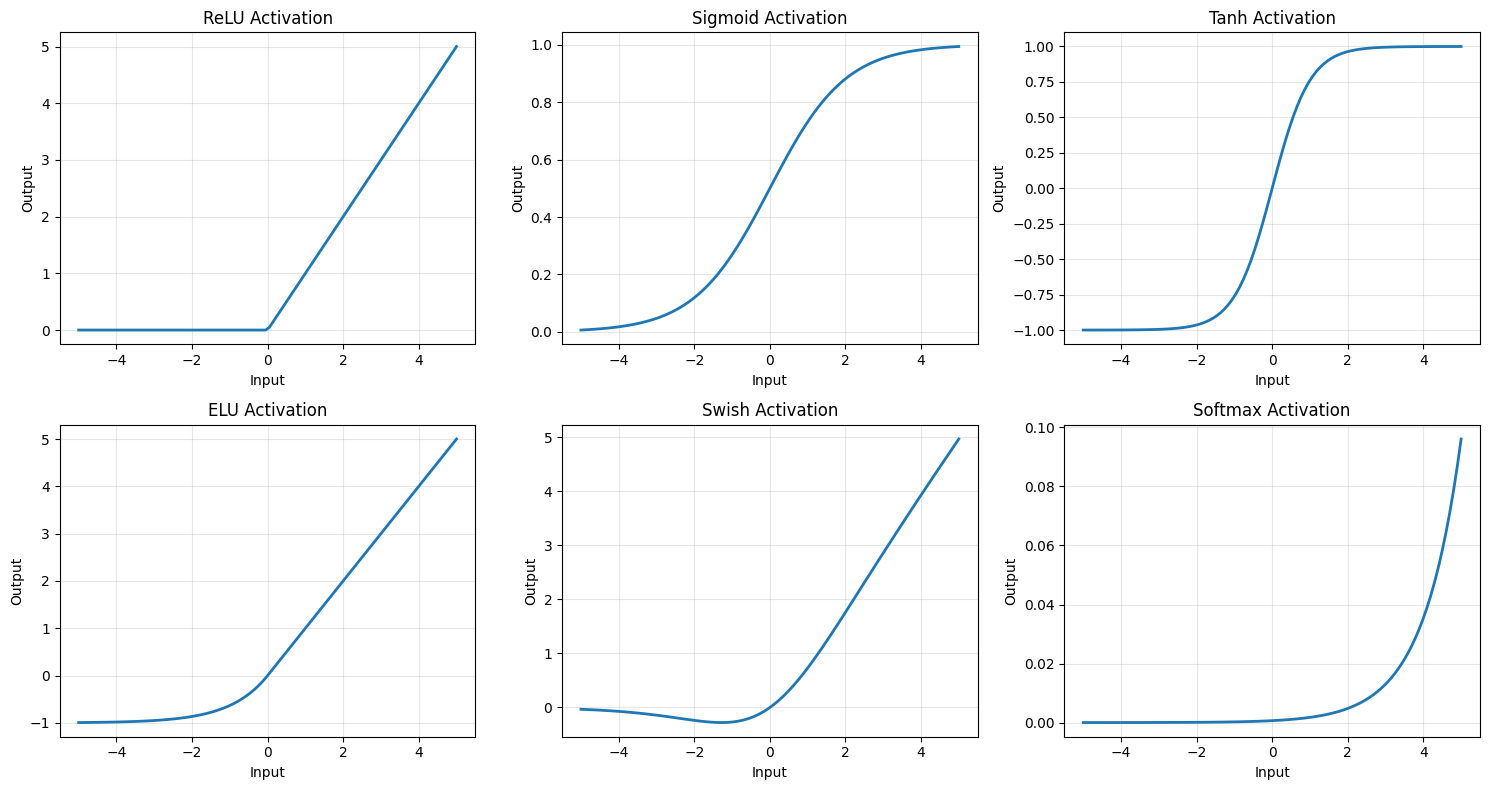

📊 Wykresy funkcji aktywacji zostały wygenerowane

🔷 WARSTWY REGULARYZACYJNE
Model z regularyzacją:
✅ BatchNormalization - stabilizuje trenowanie
✅ Dropout - zapobiega overfittingowi
✅ L2 regularization - ogranicza wagi
Parametry: 110,154


In [6]:
# 🧱 Przykłady różnych warstw i aktywacji

print("🔷 PRZEGLĄD WARSTW")
print("=" * 50)

# Dense layer
dense_layer = layers.Dense(64, activation='relu')
print(f"Dense layer: {dense_layer}")
print(f"  - Neurony: 64")
print(f"  - Aktywacja: ReLU")

# Dropout layer
dropout_layer = layers.Dropout(0.3)
print(f"\nDropout layer: {dropout_layer}")
print(f"  - Współczynnik dropout: 30%")

# BatchNormalization
batch_norm = layers.BatchNormalization()
print(f"\nBatch Normalization: {batch_norm}")

# Conv2D layer
conv_layer = layers.Conv2D(32, (3, 3), activation='relu', padding='same')
print(f"\nConv2D layer: {conv_layer}")
print(f"  - Filtry: 32")
print(f"  - Rozmiar kernela: (3, 3)")
print(f"  - Padding: same")

# MaxPooling2D
pool_layer = layers.MaxPooling2D((2, 2))
print(f"\nMaxPooling2D: {pool_layer}")
print(f"  - Rozmiar poolingu: (2, 2)")

print("\n🔷 RÓŻNE AKTYWACJE")
print("=" * 50)

# Testowanie różnych aktywacji
x = tf.linspace(-2.0, 2.0, 100)

activations = {
    'relu': tf.nn.relu,
    'sigmoid': tf.nn.sigmoid,
    'tanh': tf.nn.tanh,
    'elu': tf.nn.elu,
    'swish': tf.nn.swish
}

for name, func in activations.items():
    y = func(x)
    print(f"{name:8} - zakres: [{y.numpy().min():.3f}, {y.numpy().max():.3f}]")

print("\n🔷 PRZYKŁADY MODELI Z RÓŻNYMI WARSTWAMI")
print("=" * 50)

# Model 1: Dense neural network
print("1. DENSE NEURAL NETWORK")
dense_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

dense_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(f"Parametry: {dense_model.count_params():,}")

# Model 2: Convolutional Neural Network
print("\n2. CONVOLUTIONAL NEURAL NETWORK")
cnn_model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(f"Parametry: {cnn_model.count_params():,}")

# Model 3: RNN/LSTM
print("\n3. LSTM NEURAL NETWORK")
lstm_model = keras.Sequential([
    layers.LSTM(64, return_sequences=True, input_shape=(50, 1)),
    layers.Dropout(0.2),
    layers.LSTM(32),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(f"Parametry: {lstm_model.count_params():,}")

print("\n🔷 PORÓWNANIE FUNKCJI AKTYWACJI")
print("=" * 50)

# Wizualizacja funkcji aktywacji
try:
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    axes = axes.flatten()
    
    x_plot = np.linspace(-5, 5, 100)
    
    activation_funcs = [
        ('ReLU', tf.nn.relu),
        ('Sigmoid', tf.nn.sigmoid),
        ('Tanh', tf.nn.tanh),
        ('ELU', tf.nn.elu),
        ('Swish', tf.nn.swish),
        ('Softmax', tf.nn.softmax)
    ]
    
    for i, (name, func) in enumerate(activation_funcs):
        y_plot = func(x_plot).numpy()
        axes[i].plot(x_plot, y_plot, linewidth=2)
        axes[i].set_title(f'{name} Activation')
        axes[i].grid(True, alpha=0.3)
        axes[i].set_xlabel('Input')
        axes[i].set_ylabel('Output')
    
    plt.tight_layout()
    plt.show()
    print("📊 Wykresy funkcji aktywacji zostały wygenerowane")
    
except Exception as e:
    print(f"⚠️  Nie można wyświetlić wykresów: {e}")

print("\n🔷 WARSTWY REGULARYZACYJNE")
print("=" * 50)

# Przykład z różnymi technikami regularyzacji
regularized_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.BatchNormalization(),  # Normalizacja batcha
    layers.Dropout(0.3),          # Dropout
    
    layers.Dense(64, activation='relu', 
                kernel_regularizer=keras.regularizers.l2(0.01)),  # L2 regularization
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    layers.Dense(10, activation='softmax')
])

print("Model z regularyzacją:")
print("✅ BatchNormalization - stabilizuje trenowanie")
print("✅ Dropout - zapobiega overfittingowi")
print("✅ L2 regularization - ogranicza wagi")
print(f"Parametry: {regularized_model.count_params():,}")


## 🚀 6. PRAKTYCZNE PRZYKŁADY

### 🖼️ CNN dla klasyfikacji obrazów (CIFAR-10)

Przykład kompleksowego modelu CNN do klasyfikacji obrazów z dataset CIFAR-10.

### 📊 Klasyfikacja binarna z danymi tabelarycznymi

Przykład modelu do klasyfikacji binarnej z preprocessing danych.

### 📈 Regresja z siecią neuronową

Model do przewidywania wartości ciągłych.


In [7]:
# 🚀 PRAKTYCZNE PRZYKŁADY

print("🔷 PRZYKŁAD 1: CNN DLA KLASYFIKACJI OBRAZÓW")
print("=" * 60)

# Budowa modelu CNN
cnn_classifier = keras.Sequential([
    # Blok konwolucyjny 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    # Blok konwolucyjny 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    # Blok konwolucyjny 3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    
    # Classifier head
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Kompilacja modelu
cnn_classifier.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'top_k_categorical_accuracy']
)

print("CNN Model dla CIFAR-10:")
print(f"Parametry: {cnn_classifier.count_params():,}")
print(f"Warstwy: {len(cnn_classifier.layers)}")

# Próba wczytania danych CIFAR-10
try:
    print("\n🔷 WCZYTYWANIE DANYCH CIFAR-10")
    print("=" * 60)
    
    (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
    
    # Normalizacja pikseli
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    
    # One-hot encoding
    y_train = keras.utils.to_categorical(y_train, 10)
    y_test = keras.utils.to_categorical(y_test, 10)
    
    print(f"Kształt danych treningowych: {x_train.shape}")
    print(f"Kształt danych testowych: {x_test.shape}")
    print(f"Zakres pikseli: [{x_train.min():.1f}, {x_train.max():.1f}]")
    
    # Nazwy klas CIFAR-10
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
                   'dog', 'frog', 'horse', 'ship', 'truck']
    
    print(f"Klasy: {class_names}")
    
    # Przykład trenowania (tylko 1 epoka dla demonstracji)
    print("\n🏋️ TRENOWANIE CNN (1 epoka - demo)")
    print("=" * 60)
    
    # Callbacks
    early_stop = callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )
    
    reduce_lr = callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=0.0001
    )
    
    # Trenowanie na małym podzbiorze dla szybkości
    sample_size = 1000
    history_cnn = cnn_classifier.fit(
        x_train[:sample_size], y_train[:sample_size],
        epochs=1,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stop, reduce_lr],
        verbose=1
    )
    
    # Ocena
    test_loss, test_acc, test_top_k = cnn_classifier.evaluate(
        x_test[:200], y_test[:200], 
        verbose=0
    )
    
    print(f"Test accuracy: {test_acc:.4f}")
    print(f"Test top-k accuracy: {test_top_k:.4f}")
    
except Exception as e:
    print(f"⚠️  Błąd wczytywania CIFAR-10: {e}")
    print("To może być spowodowane brakiem połączenia lub problemami z keras.datasets")

print("\n🔷 PRZYKŁAD 2: KLASYFIKACJA BINARNA")
print("=" * 60)

# Generowanie danych syntetycznych dla klasyfikacji binarnej
np.random.seed(42)
n_samples = 1000
n_features = 20

# Generowanie danych
X_binary = np.random.randn(n_samples, n_features)
# Dodanie korelacji między cechami a targetem
y_binary = ((X_binary[:, 0] + X_binary[:, 1] - X_binary[:, 2]) > 0).astype(int)

# Preprocessing
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X_binary, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

scaler_bin = StandardScaler()
X_train_bin_scaled = scaler_bin.fit_transform(X_train_bin)
X_test_bin_scaled = scaler_bin.transform(X_test_bin)

print(f"Dane binarne - kształt: {X_train_bin_scaled.shape}")
print(f"Rozkład klas: {np.bincount(y_train_bin)}")

# Model dla klasyfikacji binarnej
binary_classifier = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(n_features,)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

# Użyj jawnie obiektów metryk Keras, aby uniknąć ValueError
from tensorflow.keras.metrics import Precision, Recall

binary_classifier.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)

print(f"Model binarny - parametry: {binary_classifier.count_params():,}")

# Trenowanie
history_binary = binary_classifier.fit(
    X_train_bin_scaled, y_train_bin,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

# Ocena
test_results_bin = binary_classifier.evaluate(
    X_test_bin_scaled, y_test_bin,
    verbose=0
)

print(f"Test accuracy: {test_results_bin[1]:.4f}")
print(f"Test precision: {test_results_bin[2]:.4f}")
print(f"Test recall: {test_results_bin[3]:.4f}")

print("\n🔷 PRZYKŁAD 3: REGRESJA")
print("=" * 60)

# Generowanie danych dla regresji
from sklearn.datasets import make_regression

X_reg, y_reg = make_regression(
    n_samples=1000, 
    n_features=10, 
    noise=0.1, 
    random_state=42
)

# Preprocessing
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

print(f"Dane regresji - kształt: {X_train_reg_scaled.shape}")
print(f"Zakres y: [{y_train_reg.min():.2f}, {y_train_reg.max():.2f}]")

# Model regresji
regression_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10,)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='linear')
])

regression_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae', 'mse']
)

print(f"Model regresji - parametry: {regression_model.count_params():,}")

# Trenowanie
history_reg = regression_model.fit(
    X_train_reg_scaled, y_train_reg,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

# Ocena
test_results_reg = regression_model.evaluate(
    X_test_reg_scaled, y_test_reg,
    verbose=0
)

print(f"Test MSE: {test_results_reg[2]:.4f}")
print(f"Test MAE: {test_results_reg[1]:.4f}")

# Przykład predykcji
sample_predictions = regression_model.predict(X_test_reg_scaled[:5], verbose=0)
print(f"\nPrzykładowe predykcje:")
for i in range(5):
    print(f"  Rzeczywiste: {y_test_reg[i]:.2f}, Przewidywane: {sample_predictions[i][0]:.2f}")

print("\n✅ WSZYSTKIE PRZYKŁADY ZAKOŃCZONE!")
print("🎓 Gratulacje! Opanowałeś podstawy TensorFlow i Keras!")


🔷 PRZYKŁAD 1: CNN DLA KLASYFIKACJI OBRAZÓW
CNN Model dla CIFAR-10:
Parametry: 737,834
Warstwy: 18

🔷 WCZYTYWANIE DANYCH CIFAR-10
Kształt danych treningowych: (50000, 32, 32, 3)
Kształt danych testowych: (10000, 32, 32, 3)
Zakres pikseli: [0.0, 1.0]
Klasy: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

🏋️ TRENOWANIE CNN (1 epoka - demo)
25/25 [==============================] - 2s 17ms/step - loss: 3.2803 - accuracy: 0.1612 - top_k_categorical_accuracy: 0.6538 - val_loss: 2.3300 - val_accuracy: 0.1350 - val_top_k_categorical_accuracy: 0.5850 - lr: 0.0010
Test accuracy: 0.1400
Test top-k accuracy: 0.5250

🔷 PRZYKŁAD 2: KLASYFIKACJA BINARNA
Dane binarne - kształt: (800, 20)
Rozkład klas: [378 422]
Model binarny - parametry: 3,713
Test accuracy: 0.9400
Test precision: 0.9352
Test recall: 0.9528

🔷 PRZYKŁAD 3: REGRESJA
Dane regresji - kształt: (800, 10)
Zakres y: [-449.01, 411.14]
Model regresji - parametry: 3,329
Test MSE: 44.1749
Test MAE: 5.242

## 🎯 PODSUMOWANIE I NAJLEPSZE PRAKTYKI

### 🔥 **Kluczowe funkcje Keras - Szybkie przypomnienie:**

#### 📋 **Workflow ML z Keras:**
1. **Przygotowanie danych** → `train_test_split`, `StandardScaler.fit_transform()`
2. **Budowa modelu** → `Sequential` lub `Functional API`
3. **Kompilacja** → `model.compile(optimizer, loss, metrics)`
4. **Trenowanie** → `model.fit(X_train, y_train, epochs, batch_size)`
5. **Ocena** → `model.evaluate(X_test, y_test)`
6. **Predykcja** → `model.predict(X_new)`
7. **Zapisywanie** → `model.save()` lub `model.save_weights()`

#### 🎯 **Najlepsze praktyki:**

##### 🔧 **Preprocessing:**
- **Zawsze normalizuj dane** → `StandardScaler` lub `/255.0` dla obrazów
- **fit_transform() na train**, **transform() na test**
- **One-hot encoding** dla klasyfikacji wieloklasowej

##### 🏗️ **Budowa modelu:**
- **Zacznij od prostego modelu** → Sequential API
- **Dodaj regularyzację** → Dropout, BatchNormalization
- **Wybierz właściwą aktywację** → ReLU dla hidden, sigmoid/softmax dla output

##### ⚙️ **Kompilacja:**
- **Adam optimizer** to dobry wybór domyślny
- **categorical_crossentropy** dla multi-class
- **binary_crossentropy** dla binary classification
- **mse** dla regresji

##### 🏋️ **Trenowanie:**
- **Użyj callbacks** → EarlyStopping, ReduceLROnPlateau
- **Validation split** 0.2 to dobry start
- **Batch size** 32 to dobry kompromis
- **Monitoruj val_loss** do early stopping

##### 📊 **Ocena:**
- **evaluate()** dla końcowej oceny
- **predict()** dla nowych danych
- **Używaj różnych metryk** → accuracy, precision, recall

### 📚 **Przydatne zasoby:**
- [TensorFlow Guide](https://www.tensorflow.org/guide)
- [Keras Documentation](https://keras.io/)
- [Deep Learning Book](https://www.deeplearningbook.org/)
- [TensorFlow Tutorials](https://www.tensorflow.org/tutorials)
